# Mean Shift Clustering

## Step 1: Environment

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import  MeanShift, estimate_bandwidth
from scipy.spatial.distance import cdist
from sklearn import metrics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation

# import seaborn as sns
# import plotly.express as pxp
# import plotly.graph_objs as gph


## Step 2: Data Preparation

In [2]:
!pwd

/Users/tdi/Documents/GitHub/foxdocs/dat-bi/Code/ML


In [3]:
# Load input data
# X = np.loadtxt('../data/data_clustering.txt', delimiter=',')
data = pd.read_csv('../../data/shopping-data.csv', delimiter=',')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Select attributes for clustering and convert to numpy
X = data.iloc[:, 2:5].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

## Step 3: Train and Implement the Model

Update the candidates for centroids to be the mean of the points within a given region (also called bandwidth). The overlapping candidates are eliminated to avoid duplicates. There is no need for pre-defined number of clusters.

In [19]:
# Bandwidth/radius is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
bandwidth 

33.20227510761323

In [20]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)

MeanShift(bandwidth=33.20227510761323, bin_seeding=True)

In [21]:
# get the calculated values 
labels = msmodel.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [22]:
labels_unique = np.unique(labels)
labels_unique

array([0])

In [23]:
n_clusters_ = len(labels_unique)
n_clusters_

1

In [11]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[54.95402299, 48.73563218],
       [81.88888889, 81.5       ],
       [82.2       , 19.37142857]])

In [12]:
# Predict the cluster label for all samples in test
Y = msmodel.predict(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [13]:
len(msmodel.labels_)

200

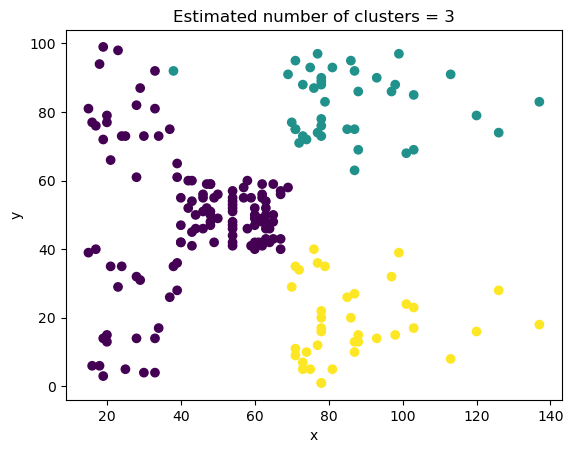

In [14]:
# Generate scatter plot for the training data
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

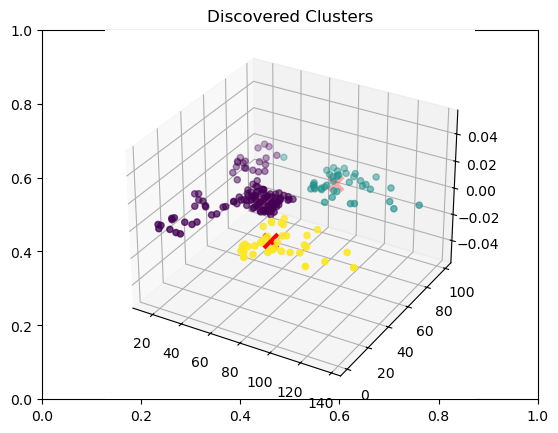

In [15]:
# Visualising the clusters in 3D
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1], marker='o',  cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=100, linewidth=3)
plt.show()

## Store the Model

In [ ]:
# !pip install joblib

In [17]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
file = '../../data/msmodel.pkl'
joblib.dump(msmodel, file)

['../../data/msmodel.pkl']